<a href="https://colab.research.google.com/github/Praveen8824/Customer-segmentation-using-K-mean/blob/main/Customer_segmentation_using_K_mean_praveenAnnual_Vs_Income_(k%24)Spending_Score_(1_100)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/colabnotebook/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# since here is all , just because unlabelled data
# i need to convert data in numpy matrix
x = df[[    'Annual Income (k$)','Spending Score (1-100)']].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

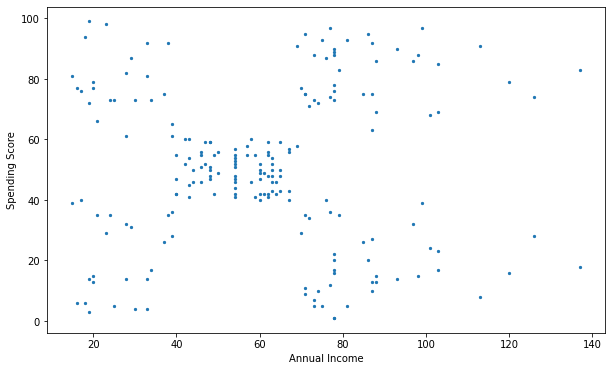

In [ ]:
# plot the data points || original shape
plt.figure(figsize=(10,6))
plt.scatter(x[:,0] ,x[:,1],s=5) # x[:,0] = age column , x[:,1]= annual income
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
# apply algorithm
# load algorithm
from sklearn.cluster import KMeans

In [ ]:
model = KMeans()
model.fit(x) # only features data

In [ ]:
# how many cluster create by model by default
model.n_clusters

8

In [ ]:
# wcss(error) || technical term inertia
model.inertia_

25011.839349156588

In [ ]:
round(model.inertia_)

25012

In [ ]:
# Elbow method
err=[]
for i in range(1,15):
  model1 = KMeans(n_clusters=i)
  model1.fit(x) # only features data
  print('Cluster number ->', i , '  || Error ->', round(model1.inertia_))
  # store the error in list err
  err.append(round(model1.inertia_))

Cluster number -> 1   || Error -> 269981
Cluster number -> 2   || Error -> 181364
Cluster number -> 3   || Error -> 106348
Cluster number -> 4   || Error -> 73680
Cluster number -> 5   || Error -> 44448
Cluster number -> 6   || Error -> 37234
Cluster number -> 7   || Error -> 30260
Cluster number -> 8   || Error -> 25007
Cluster number -> 9   || Error -> 21932
Cluster number -> 10   || Error -> 19646
Cluster number -> 11   || Error -> 17585
Cluster number -> 12   || Error -> 16215
Cluster number -> 13   || Error -> 14473
Cluster number -> 14   || Error -> 12797


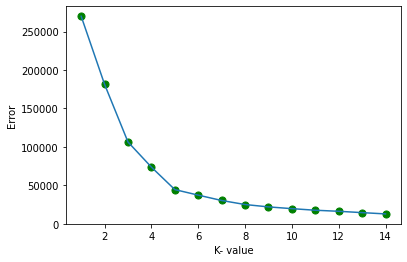

In [ ]:
# Plot the elbow
plt.plot(range(1,15), err)
plt.scatter(range(1,15), err, marker='o', c='green', s=50)
plt.xlabel('K- value')
plt.ylabel('Error')
plt.show()

In [ ]:
# we decided k= 5 will good for us
# we are building model with k= 5
model2 = KMeans(n_clusters=5)
model2.fit(x)
# get pridiction
y_kmean = model2.predict(x)  #  y_kmean = pred

In [ ]:
y_kmean

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [ ]:
# centroid coordinate
model2.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [ ]:
# datapoints which goes to cluster id =0 || cluster 1
temp_annualIncome = x[y_kmean==0,0]

In [ ]:
temp_SpendingScore = x[y_kmean==0,1]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137])

In [ ]:
temp_SpendingScore = x[y_kmean==0,1]

In [ ]:
temp_SpendingScore

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83])

In [ ]:
# tabular representation
cluster_1 = pd.DataFrame({'Annual Income' :temp_annualIncome , 'Spending Score' : temp_SpendingScore })
cluster_1

,Annual Income,Spending Score
0,69,91
1,70,77
2,71,95
3,71,75
4,71,75
5,72,71
6,73,88
7,73,73
8,74,72
9,75,93


In [ ]:
# tabular representation
cluster_2 = pd.DataFrame({'Annual Income' :x[y_kmean==1,0] , 'Spending Score' : x[y_kmean==1,1] })
cluster_2

,Annual Income,Spending Score
0,39,61
1,40,55
2,40,47
3,40,42
4,40,42
...,...,...
76,67,40
77,69,58
78,71,35
79,72,34


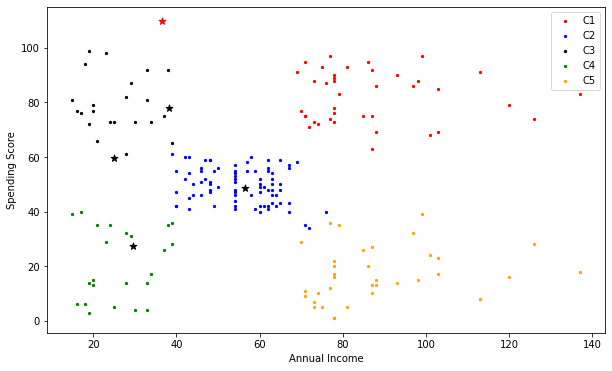

In [ ]:
# cluster vis
plt.figure(figsize=(10,6))
# =============putting cluster 1
plt.scatter(x[y_kmean==0,0],x[y_kmean==0,1] , s = 5 , c ='red', label='C1')
# put centroid
plt.scatter(25.06451613,  59.48387097 , s = 50 , c ='black', marker='*')
# ==============putting cluster 2
plt.scatter(x[y_kmean==1,0],x[y_kmean==1,1] , s = 5 , c ='blue', label='C2')
# put centroid
plt.scatter( 29.53658537,  27.24390244, s = 50 , c ='black', marker='*')
# ==============putting cluster 3
plt.scatter(x[y_kmean==2,0],x[y_kmean==2,1] , s = 5 , c ='black', label='C3')
# put centroid
plt.scatter( 36.6       , 109.7 , s = 50 , c ='red', marker='*')
# ==============putting cluster 4
plt.scatter(x[y_kmean==3,0],x[y_kmean==3,1] , s = 5 , c ='green', label='C4')
# put centroid
plt.scatter(56.62      ,  48.48 , s = 50 , c ='black', marker='*')
# ==============putting cluster 5
plt.scatter(x[y_kmean==4,0],x[y_kmean==4,1] , s = 5 , c ='orange', label='C5')
# put centroid
plt.scatter(38.25862069,  78.15517241 , s = 50 , c ='black', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
# conclusion : in Cluster 1 we found some persons whose Annual Income between 67K$ to 110K$
# thet have Spending Score between 60 to 100


# conclusion : in Cluster 2 we found some persons whose Annual Income between 40K$ TO 75K$
# thet have Spending Score between 35 to 60

# conclusion : in Cluster 3 we found some persons whose Annual Incomee between 10K$  TO 40K$
# thet have Spending Score between 60 TO 100

# conclusion : in Cluster 4 we found some persons whose Annual Income between 10K$  TO 40K$
# thet have Spending Score between 3 TO 40

# conclusion : in Cluster 5 we found some persons whose Annual Income between 70K$  TO 138K$
# thet have Spending Score between 0 TO 40

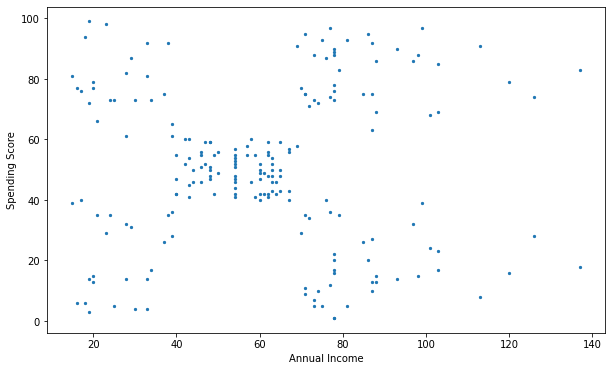

In [ ]:
# original shape
plt.figure(figsize=(10,6))
plt.scatter(x[:,0] ,x[:,1],s=5) # x[:,0] = age column , x[:,1]= annual income
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()